# Analysez des données nutritionnelles

### Generalities:

- fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
- fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
- fields that end with _tags are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
- fields that end with a language 2 letter code (e.g. fr for French) is the set of tags in that language
- fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product
- fields that end with _serving correspond to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product

List of fields:

### general information:

- code : barcode of the product (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix<br>
- url : url of the product page on Open Food Facts<br>
- creator : contributor who first added the product<br>
- created_t : date that the product was added (UNIX timestamp format)<br>
- created_datetime : date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)<br>
- last_modified_t : date that the product page was last modified<br>
- last_modified_datetime<br>
- product_name : name of the product<br>
- generic_name<br>
- quantity : quantity and unit<br>

### tags:

- packaging : shape, material<br>
- packaging_tags<br>
- brands<br>
- brands_tags<br>
- categories<br>
- categories_tags<br>
- categories_fr<br>
- origins : origins of ingredients
- origins_tags<br>
- manufacturing_places : places where manufactured or transformed<br>
- manufacturing_places_tags<br>
- labels<br>
- labels_tags<br>
- labels_fr<br>
- emb_codes<br>
- emb_codes_tags<br>
- first_packaging_code_geo : coordinates corresponding to the first packaging code indicated<br>
- cities<br>
- cities_tags<br>
- purchase_places<br>
- stores<br>
- countries : list of countries where the product is sold<br>
- countries_tags<br>
- countries_fr<br>

### ingredients:

- ingredients_text<br>
- traces<br>
- traces_tags<br>

### misc. data:

- serving_size : serving size in g<br>
- no_nutriments : indicates if the nutrition facts are indicated on the food label<br>
- additives_n : number of food additives<br>
- additives<br>
- additives_tags<br>
- ingredients_from_palm_oil_n<br>
- ingredients_from_palm_oil<br>
- ingredients_from_palm_oil_tags<br>
- ingredients_that_may_be_from_palm_oil_n<br>
- ingredients_that_may_be_from_palm_oil<br>
- ingredients_that_may_be_from_palm_oil_tags<br>
- nutrition_grade_fr : nutrition grade ('a' to 'e'). see http://fr.openfoodfacts.org/score-nutritionnel-experimental-france<br>
- main_category<br>
- main_category_fr<br>
- image_url<br>
- image_small_url<br>

### nutrition facts:

- energy_100g
- proteins_100g
- casein_100g
- serum-proteins_100g
- nucleotides_100g
- carbohydrates_100g
- sugars_100g
- sucrose_100g
- glucose_100g
- fructose_100g
- lactose_100g
- maltose_100g
- maltodextrins_100g
- starch_100g
- polyols_100g
- fat_100g
- saturated-fat_100g
- butyric-acid_100g
- caproic-acid_100g
- caprylic-acid_100g
- capric-acid_100g
- lauric-acid_100g
- myristic-acid_100g
- palmitic-acid_100g
- stearic-acid_100g
- arachidic-acid_100g
- behenic-acid_100g
- lignoceric-acid_100g
- cerotic-acid_100g
- montanic-acid_100g
- melissic-acid_100g
- monounsaturated-fat_100g
- polyunsaturated-fat_100g
- omega-3-fat_100g
- alpha-linolenic-acid_100g
- eicosapentaenoic-acid_100g
- docosahexaenoic-acid_100g
- omega-6-fat_100g
- linoleic-acid_100g
- arachidonic-acid_100g
- gamma-linolenic-acid_100g
- dihomo-gamma-linolenic-acid_100g
- omega-9-fat_100g
- oleic-acid_100g
- elaidic-acid_100g
- gondoic-acid_100g
- mead-acid_100g
- erucic-acid_100g
- nervonic-acid_100g
- trans-fat_100g
- cholesterol_100g
- fiber_100g
- sodium_100g
- alcohol_100g : % vol of alcohol
- vitamin-a_100g
- vitamin-d_100g
- vitamin-e_100g
- vitamin-k_100g
- vitamin-c_100g
- vitamin-b1_100g
- vitamin-b2_100g
- vitamin-pp_100g
- vitamin-b6_100g
- vitamin-b9_100g
- vitamin-b12_100g
- biotin_100g
- pantothenic-acid_100g
- silica_100g
- bicarbonate_100g
- potassium_100g
- chloride_100g
- calcium_100g
- phosphorus_100g
- iron_100g
- magnesium_100g
- zinc_100g
- copper_100g
- manganese_100g
- fluoride_100g
- selenium_100g
- chromium_100g
- molybdenum_100g
- iodine_100g
- caffeine_100g
- taurine_100g
- ph_100g : pH (no unit)
- fruits-vegetables-nuts_100g : % of fruits, vegetables and nuts (excluding potatoes, yams, manioc) <br><br>

- carbon-footprint_100g : carbon footprint (indicated on some products)<br><br>

- nutrition-score-fr_100g : experimental nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)
- nutrition-score-uk_100g : nutrition score defined by the UK Food Standards Administration (FSA)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


%matplotlib inline

In [2]:
dataset = pd.read_csv("dataset/fr.openfoodfacts.org.products.csv", sep='\t', dtype=object)

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: object(162)
memory usage: 396.5+ MB
None


In [4]:
print(dataset.head())

            code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957 

In [8]:
b = dataset.isnull().sum().sum()

In [9]:
print(len(dataset))
print(len(list(dataset)))
a = len(dataset) * len(list(dataset))

320772
162


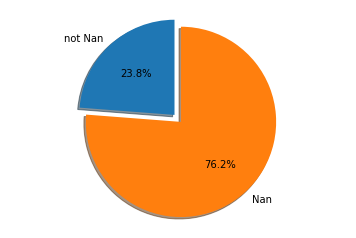

In [15]:
labels = 'not Nan', 'Nan'
sizes = [a-b, b]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("nan_count.png")
plt.show()

In [5]:
print(dataset.describe())

                 code                                                url  \
count          320749                                             320749   
unique         320749                                             320749   
top     3661030020160  http://world-fr.openfoodfacts.org/produit/0070...   
freq                1                                                  1   

                creator   created_t      created_datetime last_modified_t  \
count            320770      320769                320763          320772   
unique             3535      189567                189568          180495   
top     usda-ndb-import  1489077120  2017-03-09T16:32:00Z      1439141742   
freq             169868          20                    20              33   

       last_modified_datetime product_name  \
count                  320772       303010   
unique                 180495       221347   
top      2015-08-09T17:35:42Z    Ice Cream   
freq                       33          410   

  

## Setup Types

First we can remove all columns where datas are always NaN

In [6]:
nb_lines = len(dataset)
print(nb_lines)

320772


In [9]:
# for column in dataset:
#     nb_missing_values = dataset[column].isnull().sum()
#     if nb_missing_values == nb_lines:
#         dataset.drop(labels=[column], axis=1,inplace=True)
dataset.dropna(axis=1, how='all', inplace=True)

In [10]:
subset = [col for col in dataset if col.endswith("_100g")]
dataset = dataset.dropna(subset=subset[:-3], how='all')

In [11]:
nb_lines = len(dataset)
print(nb_lines)

265278


### general information

- code : barcode of the product (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix<br>
- url : url of the product page on Open Food Facts<br>
- creator : contributor who first added the product<br>
- created_t : date that the product was added (UNIX timestamp format)<br>
- created_datetime : date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)<br>
- last_modified_t : date that the product page was last modified<br>
- last_modified_datetime<br>
- product_name : name of the product<br>
- generic_name<br>
- quantity : quantity and unit<br>

We also have double datas with data with UNIX timestamp and the same with iso8601 format. As a result, we can remove the iso one which is more suitable to make is readable. For madel, an integer is better

In [12]:
# for column in dataset:
#     if column.endswith("_datetime") or column.endswith("_t") :
#         dataset.drop(labels=[column], axis=1,inplace=True)

We can also remove manually "useless" features for our model. This will be :
- creator : contributor who first added the product
- created_t : date that the product was added (UNIX timestamp format)
- created_datetime : date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)(already removed)
- last_modified_t : date that the product page was last modified
- last_modified_datetime (already removed)

In [13]:
# full_miss = len(dataset[(dataset["product_name"].isnull()) & (dataset["generic_name"].isnull())])
# print("{} inputs without either product name or generic name".format(full_miss))

In [14]:
dataset.drop(labels=["code", "url", "creator", "quantity", "carbon-footprint_100g"], axis=1,inplace=True)
for column in dataset:
    if column.endswith("_datetime") or column.endswith("_t") or column.endswith("_name"):
        dataset.drop(labels=[column], axis=1,inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### tags

- packaging : shape, material<br>
- packaging_tags<br>
- brands<br>
- brands_tags<br>
- categories<br>
- categories_tags<br>
- categories_fr<br>
- origins : origins of ingredients
- origins_tags<br>
- manufacturing_places : places where manufactured or transformed<br>
- manufacturing_places_tags<br><br>

- labels<br>
- labels_tags<br>
- labels_fr<br><br>

- emb_codes<br>
- emb_codes_tags<br>
- first_packaging_code_geo : coordinates corresponding to the first packaging code indicated<br>
- cities<br>
- cities_tags<br>
- purchase_places<br>
- stores<br>
- countries : list of countries where the product is sold<br>
- countries_tags<br>
- countries_fr<br>

In [15]:
dataset[["labels", "labels_tags", "labels_fr"]]

,labels,labels_tags,labels_fr
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
10,NaN,NaN,NaN


In [16]:
def custom_split(x):
    if pd.isnull(x):
        return 0
    else:
        return len(x.split(','))

In [17]:
dataset["labels"] = dataset["labels"].apply(lambda x : custom_split(x))
# dataset["labels"] = dataset["labels"].notnull()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
dataset["labels"]

1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
         ..
320680    0
320681    2
320683    3
320686    0
320689    0
320690    0
320692    1
320693    1
320694    0
320698    0
320702    1
320707    0
320717    0
320730    0
320731    0
320732    0
320734    0
320738    0
320740    0
320741    0
320742    0
320750    0
320751    4
320753    2
320756    0
320757    3
320761    1
320763    3
320768    0
320771    0
Name: labels, Length: 265278, dtype: int64

In [19]:
to_remove = ["packaging", "packaging_tags", 
             "brands", "brands_tags", 
             "categories", "categories_tags", "categories_fr",
             "origins", "origins_tags", 
             "manufacturing_places", "manufacturing_places_tags",
             "labels_tags", "labels_fr",
             "emb_codes", "emb_codes_tags", 
             "first_packaging_code_geo",
             "cities", "cities_tags",
             "purchase_places", "stores", 
             "countries", "countries_fr", "countries_tags"]
dataset.drop(labels=to_remove, axis=1, inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


### ingredients:
- ingredients_text
- traces
- traces_tags

In [20]:
dataset[dataset["traces"].notnull()]["traces"]

47                                              milk, egg, 
153       nuts, milk, soya, wheatflour, gluten, oatmeal,...
174       CONTIENT : OEUF. LAIT. ANCHOIS. SOYA. BLE. SEI...
180       Soja,Anhydride sulfureux et sulfites,Contient ...
181       Blé,Orge,Peut contenir:  Noix variés Soya Lait...
218                        Ei,Gluten,Schalenfrüchte,Alkohol
242                                     Soja,Fruits à coque
267                             Gluten,Milch,Schalenfrüchte
268                             Gluten,Milch,Schalenfrüchte
274                             Gluten,Milch,Schalenfrüchte
279                                     Soja,Fruits à coque
283                                     Fruits à coque,Soja
297                             Gluten,Milch,Schalenfrüchte
298                             Gluten,Milch,Schalenfrüchte
299                                     Fruits à coque,Soja
300                             Gluten,Milch,Schalenfrüchte
301                                     

In [21]:
dataset["traces"] = dataset["traces"].apply(lambda x : custom_split(x))
#dataset["traces"] = dataset["traces"].notnull()
dataset.drop(labels=["ingredients_text", "traces_tags", "traces_fr"], axis=1,inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### misc. data:

- serving_size : serving size in g<br>
- no_nutriments : indicates if the nutrition facts are indicated on the food label<br>
- additives_n : number of food additives<br>
- additives<br>
- additives_tags<br>
- ingredients_from_palm_oil_n<br>
- ingredients_from_palm_oil<br>
- ingredients_from_palm_oil_tags<br>
- ingredients_that_may_be_from_palm_oil_n<br>
- ingredients_that_may_be_from_palm_oil<br>
- ingredients_that_may_be_from_palm_oil_tags<br>
- nutrition_grade_fr : nutrition grade ('a' to 'e'). see http://fr.openfoodfacts.org/score-nutritionnel-experimental-france<br>
- main_category<br>
- main_category_fr<br>
- image_url<br>
- image_small_url<br>

- pnns_groups_1
- pnns_groups_2
- states
- states_tags
- states_fr

- allergens
- allergens_fr

In [22]:
print(dataset[["additives_n", "additives_tags"]])
print(dataset["additives_tags"].value_counts())

       additives_n                                     additives_tags
1                0                                                NaN
2                0                                                NaN
3                0                                                NaN
4                0                                                NaN
5                0                                                NaN
6                0                                                NaN
7                2                                   en:e123,en:e307a
8                0                                                NaN
9                0                                                NaN
10               0                                                NaN
11               0                                                NaN
12               1                                            en:e100
13               0                                                NaN
14               0  

In [23]:
pd.options.display.max_colwidth = 10000
print(dataset.loc[[15000]]["additives"]) #.value_counts()
pd.options.display.max_colwidth = 15  #default

15000     [ filtered-water -> en:filtered-water  ]  [ water -> en:water  ]  [ dried-cane-syrup -> en:dried-cane-syrup  ]  [ cane-syrup -> en:cane-syrup  ]  [ syrup -> en:syrup  ]  [ distilled-vinegar -> en:distilled-vinegar  ]  [ vinegar -> en:vinegar  ]  [ contains-less-than-2-of-dehydrated-onion -> en:contains-less-than-2-of-dehydrated-onion  ]  [ less-than-2-of-dehydrated-onion -> en:less-than-2-of-dehydrated-onion  ]  [ than-2-of-dehydrated-onion -> en:than-2-of-dehydrated-onion  ]  [ 2-of-dehydrated-onion -> en:2-of-dehydrated-onion  ]  [ of-dehydrated-onion -> en:of-dehydrated-onion  ]  [ dehydrated-onion -> en:dehydrated-onion  ]  [ onion -> en:onion  ]  [ cellulose-gum-and-xanthan-gum -> en:cellulose-gum-and-xanthan-gum  ]  [ gum-and-xanthan-gum -> en:gum-and-xanthan-gum  ]  [ and-xanthan-gum -> en:and-xanthan-gum  ]  [ xanthan-gum -> en:e415  -> exists  -- ok  ]  [ to-provide-thickness -> en:to-provide-thickness  ]  [ provide-thickness -> en:provide-thickness  ]  [ thickness -

In [24]:
print(dataset[["ingredients_from_palm_oil_n", "ingredients_from_palm_oil_tags"]])

       ingredients_from_palm_oil_n ingredients_from_palm_oil_tags
1                    0                         NaN               
2                    0                         NaN               
3                    0                         NaN               
4                    0                         NaN               
5                    0                         NaN               
6                    0                         NaN               
7                    0                         NaN               
8                    0                         NaN               
9                    0                         NaN               
10                   0                         NaN               
11                   0                         NaN               
12                   0                         NaN               
13                   0                         NaN               
14                   0                         NaN               
15        

In [25]:
print(dataset["ingredients_from_palm_oil_tags"].value_counts())

huile-de-palme                                                4316
e304-palmitate-d-ascorbyle                                     144
huile-de-palme,e304-palmitate-d-ascorbyle                       35
oleine-de-palme                                                 18
mono-et-diglycerides-d-acides-gras-de-palme                     12
huile-de-palme,oleine-de-palme                                   5
huile-de-palme,stearine-de-palme                                 5
e304-palmitate-d-ascorbyle,huile-de-palme                        4
oleine-de-palme,e304-palmitate-d-ascorbyle                       2
huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme       2
oleine-de-palme,huile-de-palme                                   1
stearine-de-palme                                                1
stearine-de-palme,huile-de-palme                                 1
mono-et-diglycerides-d-acides-gras-de-palme,huile-de-palme       1
Name: ingredients_from_palm_oil_tags, dtype: int64


In [26]:
print(dataset["ingredients_that_may_be_from_palm_oil_n"].value_counts())
print(dataset["ingredients_that_may_be_from_palm_oil_n"].isnull().sum())

0    226367
1      9549
2      1227
3       259
4        40
5         3
6         1
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64
27832


In [27]:
dataset[ dataset["ingredients_that_may_be_from_palm_oil_n"].isnull() & dataset["ingredients_from_palm_oil_n"].isnull() ]

,labels,allergens,allergens_fr,traces,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,...,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
138,0,NaN,NaN,0,48 g (0.25 ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,0,NaN,NaN,0,156.5 g / 1...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14
191,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14
234,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15
307,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
454,1,NaN,NaN,0,23 g,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,26
456,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,22
457,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,22
463,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,-2


In [28]:
print(dataset["main_category"].value_counts())

en:beverages                                       4646
en:groceries                                       2428
en:chocolates                                      2421
en:plant-based-foods-and-beverages                 2347
en:canned-foods                                    2168
en:biscuits                                        1898
en:meals                                           1853
en:frozen-foods                                    1740
en:breakfasts                                      1660
en:sugary-snacks                                   1613
en:desserts                                        1559
en:breads                                          1533
en:cheeses                                         1509
en:pastas                                          1399
en:meals-with-meat                                 1159
en:chips-and-fries                                 1111
en:cakes                                           1103
en:salted-spreads                               

In [29]:
#print(dataset[dataset["allergens"].notnull()]["allergens"])
dataset["allergens"]

1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
         ... 
320680    NaN
320681    NaN
320683    NaN
320686    NaN
320689    NaN
320690    NaN
320692    NaN
320693    NaN
320694    NaN
320698    NaN
320702    NaN
320707    NaN
320717    NaN
320730    NaN
320731    NaN
320732    NaN
320734    NaN
320738    NaN
320740    NaN
320741    NaN
320742    NaN
320750    NaN
320751    NaN
320753    NaN
320756    NaN
320757    NaN
320761    NaN
320763    NaN
320768    NaN
320771    NaN
Name: allergens, Length: 265278, dtype: object

In [30]:
dataset["allergens"] = dataset["allergens"].apply(lambda x: custom_split(x) )

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
print(dataset["allergens"].value_counts())

0     239022
1       8280
2       4734
3       3338
4       2737
5       1969
6       1497
7       1082
8        793
9        568
10       376
11       271
12       170
13       120
14        72
15        65
16        40
17        34
18        19
19        19
21        12
22        10
20        10
23         7
25         6
24         5
27         4
26         3
29         2
28         2
31         2
36         1
40         1
38         1
37         1
42         1
33         1
32         1
30         1
45         1
Name: allergens, dtype: int64


In [32]:
print(dataset["pnns_groups_1"].value_counts())
print(dataset["pnns_groups_2"].value_counts())

unknown                    13061
Sugary snacks              10362
Milk and dairy products     7810
Cereals and potatoes        7453
Beverages                   6591
Composite foods             6038
Fish Meat Eggs              5947
Fat and sauces              4156
Fruits and vegetables       4003
Salty snacks                2478
fruits-and-vegetables        766
sugary-snacks                404
cereals-and-potatoes          15
salty-snacks                   1
Name: pnns_groups_1, dtype: int64
unknown                             13061
One-dish meals                       4933
Biscuits and cakes                   4036
Cereals                              3696
Sweets                               3616
Cheese                               3517
Milk and yogurt                      2917
Dressings and sauces                 2794
Chocolate products                   2710
Processed meat                       2548
Alcoholic beverages                  2362
Non-sugared beverages                2307


In [33]:
def cleanup(word):
    if not pd.isnull(word):
        if word.count("-") > 0:
            print(word)
            word = word.replace("-", " ")
            word = word[0].upper() + word[1:]
    return word

dataset["pnns_groups_1"] = dataset["pnns_groups_1"].apply(lambda x : cleanup(x))
print(dataset["pnns_groups_1"].value_counts())

fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
sugary-snacks
sugary-snacks
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetab

sugary-snacks
sugary-snacks
sugary-snacks
sugary-snacks
sugary-snacks
sugary-snacks
sugary-snacks
sugary-snacks
sugary-snacks
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
sugary-snacks
sugary-snacks
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
sugary-snacks
fruits-and-vegetables
fruits-and-vegetables
fruits-and-veget

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
dataset.drop(labels=["ingredients_from_palm_oil_tags", "ingredients_that_may_be_from_palm_oil_tags", 
                     "additives", "additives_tags", "additives_fr",
                     "serving_size", "additives", 
                     "main_category", "main_category_fr", 
                     "image_small_url", "image_url",
                     "states", "states_tags", "states_fr",
                     "allergens_fr"
                    ], axis=1,inplace=True)

#"ingredients_from_palm_oil", "ingredients_from_palm_oil_tags", "ingredients_that_may_be_from_palm_oil", ""ingredients_that_may_be_from_palm_oil_tags""

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### nutrition facts:

- energy_100g
- proteins_100g
- casein_100g
- serum-proteins_100g
- nucleotides_100g
- carbohydrates_100g
- sugars_100g
- sucrose_100g
- glucose_100g
- fructose_100g
- lactose_100g
- maltose_100g
- maltodextrins_100g
- starch_100g
- polyols_100g
- fat_100g
- saturated-fat_100g
- butyric-acid_100g
- caproic-acid_100g
- caprylic-acid_100g
- capric-acid_100g
- lauric-acid_100g
- myristic-acid_100g
- palmitic-acid_100g
- stearic-acid_100g
- arachidic-acid_100g
- behenic-acid_100g
- lignoceric-acid_100g
- cerotic-acid_100g
- montanic-acid_100g
- melissic-acid_100g
- monounsaturated-fat_100g
- polyunsaturated-fat_100g
- omega-3-fat_100g
- alpha-linolenic-acid_100g
- eicosapentaenoic-acid_100g
- docosahexaenoic-acid_100g
- omega-6-fat_100g
- linoleic-acid_100g
- arachidonic-acid_100g
- gamma-linolenic-acid_100g
- dihomo-gamma-linolenic-acid_100g
- omega-9-fat_100g
- oleic-acid_100g
- elaidic-acid_100g
- gondoic-acid_100g
- mead-acid_100g
- erucic-acid_100g
- nervonic-acid_100g
- trans-fat_100g
- cholesterol_100g
- fiber_100g
- sodium_100g
- alcohol_100g : % vol of alcohol
- vitamin-a_100g
- vitamin-d_100g
- vitamin-e_100g
- vitamin-k_100g
- vitamin-c_100g
- vitamin-b1_100g
- vitamin-b2_100g
- vitamin-pp_100g
- vitamin-b6_100g
- vitamin-b9_100g
- vitamin-b12_100g
- biotin_100g
- pantothenic-acid_100g
- silica_100g
- bicarbonate_100g
- potassium_100g
- chloride_100g
- calcium_100g
- phosphorus_100g
- iron_100g
- magnesium_100g
- zinc_100g
- copper_100g
- manganese_100g
- fluoride_100g
- selenium_100g
- chromium_100g
- molybdenum_100g
- iodine_100g
- caffeine_100g
- taurine_100g
- ph_100g : pH (no unit)
- fruits-vegetables-nuts_100g : % of fruits, vegetables and nuts (excluding potatoes, yams, manioc) <br><br>

- carbon-footprint_100g : carbon footprint (indicated on some products)<br><br>

- nutrition-score-fr_100g : experimental nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)
- nutrition-score-uk_100g : nutrition score defined by the UK Food Standards Administration (FSA)

In [35]:
for column in dataset:
    if column.endswith("_100g") or column.endswith("_serving"):
        dataset[column] = dataset[column].astype("float")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
# print(dataset[["nutrition-score-fr_100g", "nutrition-score-uk_100g"]])
print(dataset[(dataset["nutrition-score-fr_100g"] != dataset["nutrition-score-uk_100g"]) & dataset["nutrition-score-fr_100g"].notnull()][["nutrition-score-fr_100g", "nutrition-score-uk_100g"]])
# print(dataset["nutrition-score-uk_100g"].value_counts())

        nutrition-score-fr_100g  nutrition-score-uk_100g
226               13.0                      2.0         
240               13.0                      2.0         
648               11.0                     20.0         
664               12.0                      1.0         
695               14.0                     19.0         
10253             15.0                     11.0         
10285             10.0                      1.0         
10358             -2.0                     -4.0         
13112             18.0                      2.0         
13121             15.0                      2.0         
13129              0.0                     -4.0         
13133             15.0                      2.0         
13134              0.0                     -4.0         
13135              2.0                     -4.0         
13138             15.0                      2.0         
13537             17.0                     22.0         
13768              2.0         

In [37]:
for col in dataset :
    if col.endswith("_100g"):
        if dataset[col].notnull().sum() < 1000:
            dataset.drop(labels=[col], axis=1,inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
dataset.drop(labels=["nutrition-score-fr_100g"], axis=1,inplace=True)
dataset.drop(labels=["sodium_100g"], axis=1,inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
a = 0
for col in dataset:
    if col.endswith("_100g") and not col.startswith("nutrition-score"):
        print(col, dataset[col].min())
        a += len(dataset[dataset[col]<0])
print(a)
dataset["iron_100g"].describe()

energy_100g 0.0
fat_100g 0.0
saturated-fat_100g 0.0
monounsaturated-fat_100g 0.0
polyunsaturated-fat_100g 0.0
trans-fat_100g -3.57
cholesterol_100g 0.0
carbohydrates_100g 0.0
sugars_100g -17.86
fiber_100g -6.7
proteins_100g -800.0
salt_100g 0.0
alcohol_100g 0.0
vitamin-a_100g -0.0003396
vitamin-d_100g 0.0
vitamin-e_100g 0.0
vitamin-c_100g -0.0021
vitamin-b1_100g 0.0
vitamin-b2_100g 0.0
vitamin-pp_100g 0.0
vitamin-b6_100g 0.0
vitamin-b9_100g 0.0
folates_100g 0.0
vitamin-b12_100g 0.0
pantothenic-acid_100g -2.0
potassium_100g 0.0
calcium_100g 0.0
phosphorus_100g 0.0
iron_100g -0.00026
magnesium_100g 0.0
zinc_100g 0.0
copper_100g -6.896552
manganese_100g 0.0
selenium_100g -2e-06
fruits-vegetables-nuts_100g 0.0
28


count    140462.000000
mean          0.003652
std           0.214408
min          -0.000260
25%           0.000000
50%           0.001010
75%           0.002400
max          50.000000
Name: iron_100g, dtype: float64

In [40]:
dataset = dataset[(dataset["fat_100g"] < 99) | (dataset["fat_100g"].isnull())]
dataset = dataset[(dataset["trans-fat_100g"] < 99)  | (dataset["trans-fat_100g"].isnull()) ]
dataset = dataset[(dataset["saturated-fat_100g"] < 99) | (dataset["saturated-fat_100g"].isnull())]

dataset = dataset[(dataset["energy_100g"] < 4000) | (dataset["energy_100g"].isnull())]
dataset = dataset[(dataset["salt_100g"] < 30) | (dataset["salt_100g"].isnull())]

minerals = ["trans-fat_100g", "vitamin-b12_100g", "pantothenic-acid_100g", "potassium_100g", "calcium_100g",  "phosphorus_100g", "iron_100g", ]
for each in minerals:
    dataset = dataset[(dataset[each] < 2) | (dataset[each].isnull())]

for col in dataset:
    if col.startswith("vitamin"):
        dataset = dataset[(dataset[col] < 2) | (dataset[col].isnull())]
    if col.endswith("_100g") and not col.startswith(("energy", "nutrition-score")):
        dataset = dataset[( (dataset[col] >= 0) & (dataset[col] < 100) ) | (dataset[col].isnull())]

dataset = dataset[(dataset["monounsaturated-fat_100g"] < dataset["fat_100g"])  | (dataset["monounsaturated-fat_100g"].isnull()) ]
dataset = dataset[(dataset["polyunsaturated-fat_100g"] < dataset["fat_100g"])  | (dataset["polyunsaturated-fat_100g"].isnull()) ]

In [41]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255497 entries, 1 to 320771
Data columns (total 45 columns):
labels                                     255497 non-null int64
allergens                                  255497 non-null int64
traces                                     255497 non-null int64
additives_n                                228057 non-null object
ingredients_from_palm_oil_n                228057 non-null object
ingredients_that_may_be_from_palm_oil_n    228057 non-null object
nutrition_grade_fr                         215309 non-null object
pnns_groups_1                              67970 non-null object
pnns_groups_2                              70380 non-null object
energy_100g                                251412 non-null float64
fat_100g                                   234482 non-null float64
saturated-fat_100g                         222680 non-null float64
monounsaturated-fat_100g                   20131 non-null float64
polyunsaturated-fat_100g         

In [46]:
# dataset["fat_100g"].mean()
# dataset["fat_100g"].std()
threshold = 5
for column in dataset:
    if column.endswith("_100g") and not column.startswith(("energy", "nutrition-score")):
        max_valid = dataset[column].mean() + threshold * dataset[column].std()
        dataset = dataset[(dataset[column] <= max_valid) | (dataset[column].isnull())]

In [41]:
dataset.to_csv("dataset/cleaned_dataset.csv", sep='\t', index=False)